In [1]:
import numpy as np
import pandas as pd
import math, random
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Loading Data and Randomly Sampling

In [2]:
sp_data = pd.read_csv('special_traffic.csv', sep = ',', index_col = None)
special_traffic = sp_data.sample(n = 1000, random_state = 123).reset_index()
special_traffic.head()

,index,idx,maximum_speed,speed_limit,average_speed,vehicle_class_1,vehicle_class_2,vehicle_class_3,vehicle_class_4,vehicle_class_5,...,vehicle_class_7,vehicle_class_8,vehicle_class_9,vehicle_class_10,vehicle_class_11,vehicle_class_12,vehicle_class_13,bike,motorcycle,StrType
0,3112,13757,130,40,16,91,0,1,0,0,...,0,0,0,0,0,0,0,38,1,Council Minor
1,3125,33795,37,50,25,36,0,0,0,0,...,0,0,0,0,0,0,0,3,4,Council Minor
2,3637,10063,41,50,35,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Council Minor
3,815,21026,92,60,48,759,3,27,6,1,...,0,0,0,0,0,0,0,1,9,Arterial
4,2600,38589,57,50,38,572,0,9,0,0,...,1,0,1,0,0,0,0,0,1,Arterial


# 3.2(a)

## Extracted the x Value

In [3]:
used_x = special_traffic.loc[:,'maximum_speed': 'motorcycle']
used_x.head()

,maximum_speed,speed_limit,average_speed,vehicle_class_1,vehicle_class_2,vehicle_class_3,vehicle_class_4,vehicle_class_5,vehicle_class_6,vehicle_class_7,vehicle_class_8,vehicle_class_9,vehicle_class_10,vehicle_class_11,vehicle_class_12,vehicle_class_13,bike,motorcycle
0,130,40,16,91,0,1,0,0,0,0,0,0,0,0,0,0,38,1
1,37,50,25,36,0,0,0,0,0,0,0,0,0,0,0,0,3,4
2,41,50,35,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,92,60,48,759,3,27,6,1,0,0,0,0,0,0,0,0,1,9
4,57,50,38,572,0,9,0,0,1,1,0,1,0,0,0,0,0,1


In [4]:
y = special_traffic[['StrType']]
y.head()

,StrType
0,Council Minor
1,Council Minor
2,Council Minor
3,Arterial
4,Arterial


In [5]:
y['StrType'].unique()

array(['Council Minor', 'Arterial'], dtype=object)

## PCA Plot with original x 

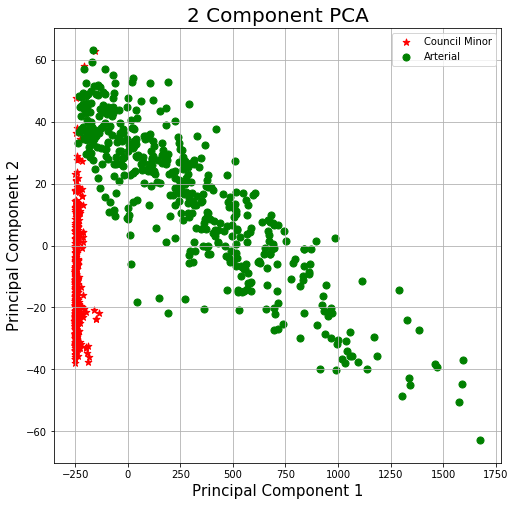

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(used_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Council Minor', 'Arterial']
colors = ['r', 'g']
markers = ['*', 'o']
for target, color, marker in zip(targets,colors, markers):
    indicesToKeep = finalDf['StrType'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               marker = marker,
               s = 50)
ax.legend(targets)
ax.grid()

In [7]:
pca.explained_variance_ratio_

array([0.9932373 , 0.00420167])

# 3.2(b)

In [8]:
# From the explained variance ratio above, we know that the first two pricipal components has contained more than 99.7% of variance of
# the whole dataset. In addition, the first pricipal component contains 99.3% and the second contains 0.4%.
# From the plot above, we can easily separated data into two groups, Council Minor and Arterial, based on the two new features,
# the first Principal Conponent and the second Pricipal Conponent. We can condclude that variables that greater than -125 in first 
# Principal Conponent and greater than 50 in second Principal Conponent are Arterial. Otherwise, they are Council Minor.

# 3.2(c)

In [9]:
def vat(R):
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
    
    J = list(range(0, N))
    y = np.max(R, axis = 0)
    i = np.argmax(R, axis = 0)
    j = np.argmax(y)
    y = np.max(y)
    
    I = i[j]
    del J[I]
    
    y = np.min(R[I, J], axis = 0)
    j = np.argmin(R[I, J], axis = 0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1, 1]
    for r in range(2, N - 1):
        y = np.min(R[I, :][:, J], axis = 0)
        i = np.argmin(R[I, :][:, J], axis = 0)
        j = np.argmin(y)
        y = np.min(y)
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
        
    y = np.min(R[I, :][:, j], axis = 0)
    i = np.argmin(R[I, :][:, J], axis = 0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx
    
    RV = R[I, :][:, I]
    return RV.tolist(), C, I

### Heatmap with Principal Components 

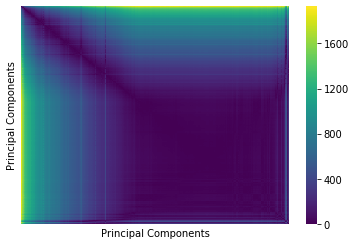

In [10]:
RV, C, I = vat(principalDf)
x = sns.heatmap(RV, cmap = 'viridis', xticklabels = False, yticklabels = False)
x.set(xlabel = 'Principal Components', ylabel = 'Principal Components')
plt.show()

### Heatmap with Original Features 

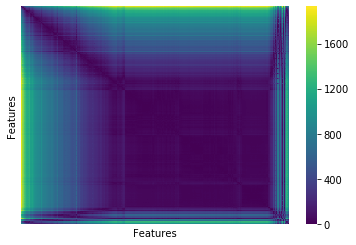

In [11]:
RV, C, I = vat(used_x)
x = sns.heatmap(RV, cmap = 'viridis', xticklabels = False, yticklabels = False)
x.set(xlabel = 'Features', ylabel = 'Features')
plt.show()

# 3.2(d)

In [12]:
# From the two plots above, we can easily conclude that dataset could be separated into two clusters, based on
# the colors of the heatmap.
# One cluster, colored in deep purple, are in bottom right and upper left. And the other cluster, colored in light
# green and blue, are concentrated upper right and letf side.
# However, we can see that the edge of two clusters on the plot with all features is not very clear. We can find
# the light color on the bottom and right side. On the contrary, the edge of the plot with principal conponents is
# clear and smooth. One cluster is not embedded on the other one.